2023-06-13 17:02:43,243 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\backend\__init__.py[line:36] - INFO: You can use `os.environ['CASTLE_BACKEND'] = backend` to set the backend(`pytorch` or `mindspore`).
2023-06-13 17:02:43,392 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\algorithms\__init__.py[line:36] - INFO: You are using ``pytorch`` as the backend.
2023-06-13 17:02:43,396 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


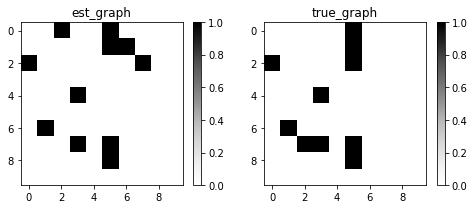

In [4]:
from castle.common import GraphDAG
from castle.metrics import MetricsDAG
from castle.datasets import IIDSimulation, DAG
from castle.algorithms import PC

# data simulation, simulate true causal dag and train_data.
weighted_random_dag = DAG.erdos_renyi(n_nodes=10, n_edges=10, 
                                      weight_range=(0.5, 2.0), seed=1)
dataset = IIDSimulation(W=weighted_random_dag, n=2000, method='linear', 
                        sem_type='gauss')
true_causal_matrix, X = dataset.B, dataset.X

# structure learning
pc = PC()
pc.learn(X)

# plot predict_dag and true_dag
GraphDAG(pc.causal_matrix, true_causal_matrix, 'result')

# calculate metrics
# mt = MetricsDAG(pc.causal_matrix, true_causal_matrix)
# print(mt.metrics)

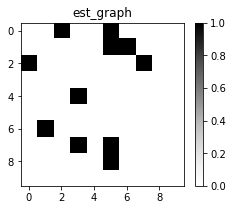

In [5]:
GraphDAG(pc.causal_matrix)

In [6]:
import networkx as nx
import pydot as pyd
# import pygraphviz
graph = nx.from_numpy_array(pc.causal_matrix, create_using=nx.MultiDiGraph)
# nx.nx_agraph.to_agraph(graph)
pydot_graph = nx.nx_pydot.to_pydot(graph)
# pydot_graph
# pydot_graph.write_png('example.png')

C:\Users\JanMarco\AppData\Local\Temp\ipykernel_131164\2238401464.py:6: DeprecationWarning: nx.nx_pydot.to_pydot depends on the pydot package, which hasknown issues and is not actively maintained.

See https://github.com/networkx/networkx/issues/5723
  pydot_graph = nx.nx_pydot.to_pydot(graph)


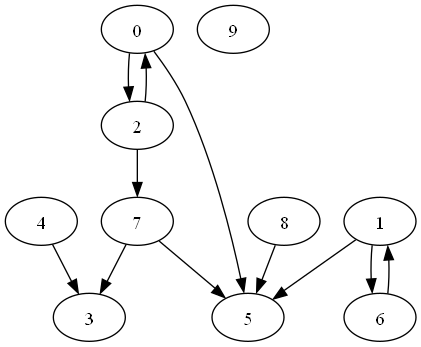

In [7]:
from IPython.display import Image, display

def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)
view_pydot(pydot_graph)